In [1]:
import sys
sys.path.append("..") 
import numpy as np

import matplotlib.pyplot as plt 
from src.data.generate_synthetic_data import generate_sphere_data
from sklearn.model_selection import train_test_split
from src.models.twolayer_nn import TwoLayerNNModel
from src.sgd.nonconvex import NonConvexSGD, FixedStepsize, DiminishingStepsize
np.random.seed(0)

In [2]:
width = 5000
d = 4
degree = 2
noise = 0.000
epochs = 100
batch_size = 1
alpha = 0.0001

sample_sizes = [d, int((d + (d**2))/2), d**2, int(((d**2) + (d**3))/2), d**3, int(((d**3) + (d**4))/2), d**4]
sample_labels = [f"$d$", "", f"$d^2$", "", f"$d^3$", "", f"$d^4$"]
test_errors = []

for n in sample_sizes:
    np.random.seed(0)
    X, y, _, _ = generate_sphere_data(n, d, degree, noise)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    nn = TwoLayerNNModel(input_dim=d, hidden_dim=width)
    stepsize = FixedStepsize(alpha=alpha)
    sgd = NonConvexSGD(
        model=nn,
        X=X_train,
        y=y_train,
        num_epochs=epochs,
        batch_size=batch_size,
        stepsize_type=stepsize
    )
    w, _, _ = sgd.optimize()
    y_pred_test = nn.forward_batch(X_test, w)
    test_mse = np.mean((y_pred_test - y_test) ** 2)
    test_errors.append(test_mse)
    print(f"n={n}, Test MSE={test_mse:.4f}")


n=4, Test MSE=0.3789
n=10, Test MSE=0.0075
n=16, Test MSE=0.0451
n=40, Test MSE=0.0132
n=64, Test MSE=0.0051
n=160, Test MSE=0.0024
n=256, Test MSE=0.0027


/var/folders/v8/k38qrhtj2sg_22kzbmh35pm40000gp/T/ipykernel_81730/627886824.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # cleaner base


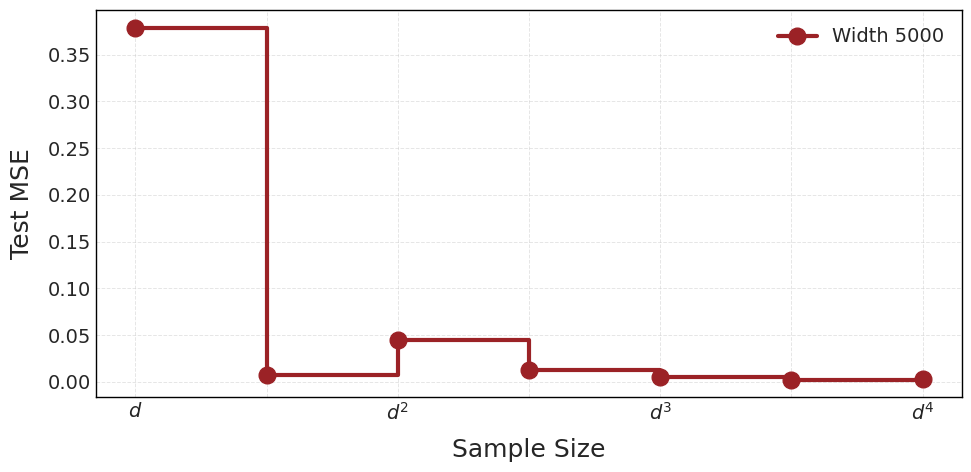

In [3]:
import matplotlib as mpl

# Style setup

plt.style.use("seaborn-whitegrid")  # cleaner base
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.spines.left": True,
    "axes.spines.bottom": True
})
# Sample data
x = np.arange(len(sample_sizes))
sample_labels = [r"$d$", "", r"$d^2$", "", r"$d^3$", "", r"$d^4$"]  
width = 5000

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.step(x, test_errors, where='post', marker='o', markersize=12, linewidth=3,
        color="#9B2226", label=f'Width {width}')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color("black")


# Axis & title
ax.set_xticks(x)
ax.set_xticklabels(sample_labels)
ax.set_xlabel("Sample Size", labelpad=10)
ax.set_ylabel("Test MSE", labelpad=10)

# Grid
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Legend
ax.legend(loc='upper right', frameon=False)

# Finalize
plt.tight_layout()
plt.show()

In [ ]:
sample_sizes = np.unique(np.logspace(1.3, 3.9, 15, dtype=int))
widths = [16, 64, 256, 1024, 2048]
d = 5
degree = 3
noise = 0.000
epochs = 10
batch_size = 1
alpha = 0.005

width_results = {w: [] for w in widths}

for width in widths:
    print(f"Running width {width}")
    for n in sample_sizes:
        np.random.seed(0)
        X, y, _, _ = generate_sphere_data(n, d, degree, noise)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        nn = TwoLayerNNModel(input_dim=d, hidden_dim=width)
        stepsize = FixedStepsize(alpha=alpha)
        sgd = NonConvexSGD(
            model=nn,
            X=X_train,
            y=y_train,
            num_epochs=epochs,
            batch_size=batch_size,
            stepsize_type=stepsize
        )
        w, _, _ = sgd.optimize()
        y_pred_test = nn.forward_batch(X_test, w)
        test_mse = np.mean((y_pred_test - y_test) ** 2)
        width_results[width].append(test_mse)
        print(f"n={n}, Test MSE={test_mse:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
for width in widths:
    plt.plot(sample_sizes, width_results[width], marker='o', label=f'Width {width}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sample Size (n)")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Sample Size (1 trial, no noise)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Running width 16
n=19, Test MSE=0.1823
n=30, Test MSE=0.3138
n=46, Test MSE=0.1703
n=71, Test MSE=0.0515
n=110, Test MSE=0.0243
n=169, Test MSE=0.0341
n=259, Test MSE=0.0261
n=398, Test MSE=0.0133
n=610, Test MSE=0.0125
n=936, Test MSE=0.0112
n=1435, Test MSE=0.0099
n=2202, Test MSE=0.0087
n=3377, Test MSE=0.0045
n=5179, Test MSE=0.0028
n=7943, Test MSE=0.0042
Running width 64
n=19, Test MSE=0.1119
n=30, Test MSE=0.0812
n=46, Test MSE=0.0601
n=71, Test MSE=0.0392
n=110, Test MSE=0.0284
n=169, Test MSE=0.0149
n=259, Test MSE=0.0158
n=398, Test MSE=0.0110
n=610, Test MSE=0.0073
n=936, Test MSE=0.0081
n=1435, Test MSE=0.0085
n=2202, Test MSE=0.0063
n=3377, Test MSE=0.0055
n=5179, Test MSE=0.0030
n=7943, Test MSE=0.0023
Running width 256
n=19, Test MSE=0.0593
n=30, Test MSE=0.0475
n=46, Test MSE=0.0444
n=71, Test MSE=0.0177
n=110, Test MSE=0.0170
n=169, Test MSE=0.0115
n=259, Test MSE=0.0164
n=398, Test MSE=0.0087
n=610, Test MSE=0.0097
n=936, Test MSE=0.0100
n=1435, Test MSE=0.0067
n=2202